# Segmentation Network Conv. Layer Visualizations:

### Setup

In [5]:
%run classificationFns.py # Import functions

In [2]:
model = '/home/nathan/mzmo/segmentation/m0/segnet_basic_inference.prototxt'
weights = '/home/nathan/semantic-pca/weights/dec_7/norm_65000.caffemodel'

net = define_network(model, weights)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### Run network & plot the result
The function `plot_layers` plots the layers of the network passed in as string parameters.  
Top two: input image & output label as grayscale.  
The rest are hidden convolution and deconvolution layers. In the colormap, pure red = 1, and deep blue = 0.  
Each "blob" is a 3D tensor:  
1st dimension ~ image width, 2nd dimension ~ image height, 3rd dimension ~ related to the convolution "kernel".  
`np.amax` : maximum value along the 3rd dimension  
`np.argmax` : location of the maximum value along the 3rd dimension

Plotting 5 figures


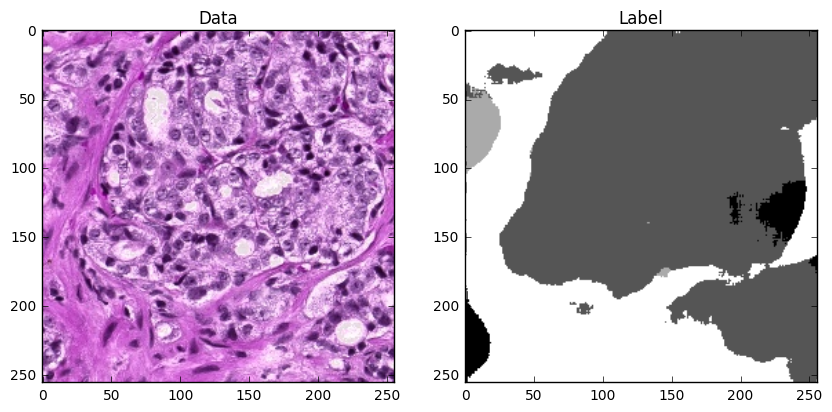

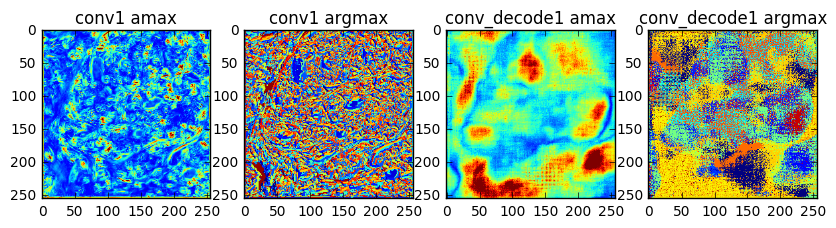

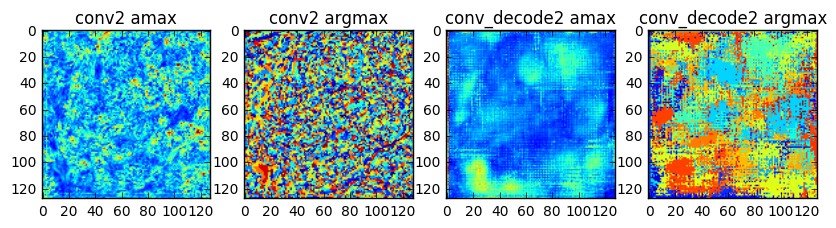

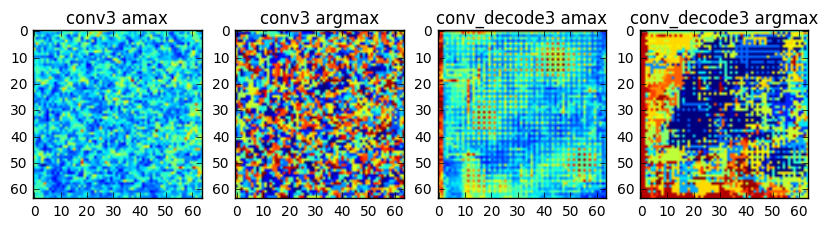

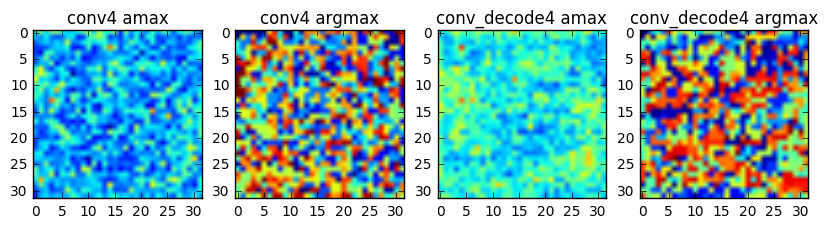

In [9]:
_ = net.forward() #--- dump output into a blank variable ~~ check this for pythonicity

img = get_img_from_net(net)

plot_layers(net, layer_names=['data_segmentation', 
                              ['conv1', 'conv_decode1'], 
                              ['conv2', 'conv_decode2'], 
                              ['conv3', 'conv_decode3'], 
                              ['conv4', 'conv_decode4']])
                              #['conv1', 'upsample1'], 
                              #['conv2', 'upsample2'], 
                              #['conv3', 'upsample3'], 
                              #['conv4', 'upsample4']])

In [69]:
net.blobs['prob'].data.shape

(1, 4, 256, 256)

In [110]:
net.blobs

OrderedDict([('data', <caffe._caffe.Blob at 0x7f6a1bd7f6e0>),
             ('label', <caffe._caffe.Blob at 0x7f6a1a02e488>),
             ('norm', <caffe._caffe.Blob at 0x7f6a1a02e398>),
             ('conv1', <caffe._caffe.Blob at 0x7f6a1a02e050>),
             ('pool1', <caffe._caffe.Blob at 0x7f6a19e1de60>),
             ('pool1_mask', <caffe._caffe.Blob at 0x7f6a19e1dc80>),
             ('conv2', <caffe._caffe.Blob at 0x7f6a19e1d1b8>),
             ('pool2', <caffe._caffe.Blob at 0x7f6a19e1db18>),
             ('pool2_mask', <caffe._caffe.Blob at 0x7f6a19e1d410>),
             ('conv3', <caffe._caffe.Blob at 0x7f6a19e1d938>),
             ('pool3', <caffe._caffe.Blob at 0x7f6a19e1d488>),
             ('pool3_mask', <caffe._caffe.Blob at 0x7f6a19e1d230>),
             ('conv4', <caffe._caffe.Blob at 0x7f6a19e1da28>),
             ('pool4', <caffe._caffe.Blob at 0x7f6a19e1d5f0>),
             ('pool4_mask', <caffe._caffe.Blob at 0x7f6a1a0c9668>),
             ('upsample4', <caffe._ca

In [124]:
net.blobs['upsample1'].data.shape

(1, 64, 256, 256)

In [12]:
net.blobs['conv_classifier'].data.shape

(1, 4, 256, 256)